In [11]:
#import libraries to use with data (CVS) file
import pandas as pd
import numpy as np

In [37]:
#load csv file data with headers

data = "datasets\diamonds.csv"
df = pd.read_csv((data),index_col=0)

In [38]:
#show the headers and default data list
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [68]:
#show the tail and default data list from the bottom-up
df.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,Customer_Prize_Tag
53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,Regular
53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,Regular
53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47,Regular
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49,Regular
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,Regular
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Regular
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Regular
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Regular
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Regular
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,Regular


In [43]:
df['price'].dtypes
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [132]:
#Define bins as 326-1000, 1001-5000, 5001-10000, 10001-15000, 150001-200000
bins = [325, 10000, 15000, 20000]

# Create names for the four groups
cut_tag = ['Prospect', 'Business', 'Elite']

In [133]:
#make new column with Cut Grading Schema
df['mytag'] = pd.cut(df['price'], bins, labels = cut_tag)
df.head()
pd.value_counts(df['mytag']) # number of observations per customer price group

Prospect    48718
Business     3567
Elite        1655
Name: mytag, dtype: int64

In [136]:
#make new column with Price Grading Schema
df['Customer_Prize_Tag'] = pd.cut(df['price'], bins, labels=cut_tag)
#df.head()
pd.value_counts(df['Customer_Prize_Tag']) # number of observations per customer price group

Prospect    48718
Business     3567
Elite        1655
Name: Customer_Prize_Tag, dtype: int64

In [137]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Customer_Prize_Tag,mytag
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Prospect,Prospect
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Prospect,Prospect
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Prospect,Prospect
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Prospect,Prospect
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Prospect,Prospect


In [139]:
df.sort_values('cut') #default is ascending=True
#does not change structure of df

,carat,cut,color,clarity,depth,table,price,x,y,z,Customer_Prize_Tag,mytag
3851,1.01,Fair,F,SI2,64.8,55.0,3477,6.37,6.26,4.10,Prospect,Prospect
51465,1.20,Fair,G,I1,66.6,57.0,2376,6.57,6.50,4.34,Prospect,Prospect
51467,0.90,Fair,G,SI2,65.4,57.0,2376,6.01,5.97,3.98,Prospect,Prospect
10238,1.26,Fair,D,SI2,64.5,59.0,4746,6.75,6.71,4.34,Prospect,Prospect
10761,1.01,Fair,E,SI1,69.5,55.0,4853,6.00,5.94,4.15,Prospect,Prospect
14646,2.00,Fair,H,I1,69.8,54.0,5914,7.60,7.56,5.29,Prospect,Prospect
13272,1.00,Fair,G,VS2,63.7,55.0,5484,6.28,6.21,3.98,Prospect,Prospect
13271,1.00,Fair,G,VS2,67.6,57.0,5484,6.20,6.13,4.17,Prospect,Prospect
22872,2.00,Fair,H,SI2,67.9,55.0,10913,7.67,7.58,5.18,Business,Business
7587,1.00,Fair,E,SI2,65.2,56.0,4256,6.30,6.12,4.05,Prospect,Prospect


In [147]:
meanprice = df['price'].mean()
stdprice = df['price'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf = df #because we don't want to mess up the original df
copydf = copydf.drop(copydf[copydf['price'] > toprange].index)
copydf = copydf.drop(copydf[copydf['price'] < botrange].index)

copydf.count()

carat                 50300
cut                   50300
color                 50300
clarity               50300
depth                 50300
table                 50300
price                 50300
x                     50300
y                     50300
z                     50300
Customer_Prize_Tag    50300
mytag                 50300
dtype: int64

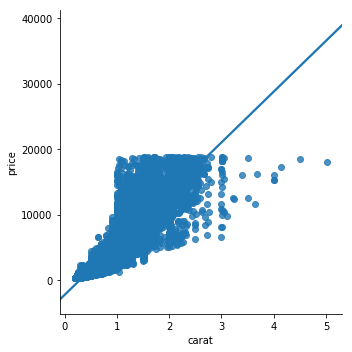

In [153]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set_style('darkgrid') #my default is "whitegrid"
#make a scatterplot
sns.lmplot(x='carat', y='price', data=df)

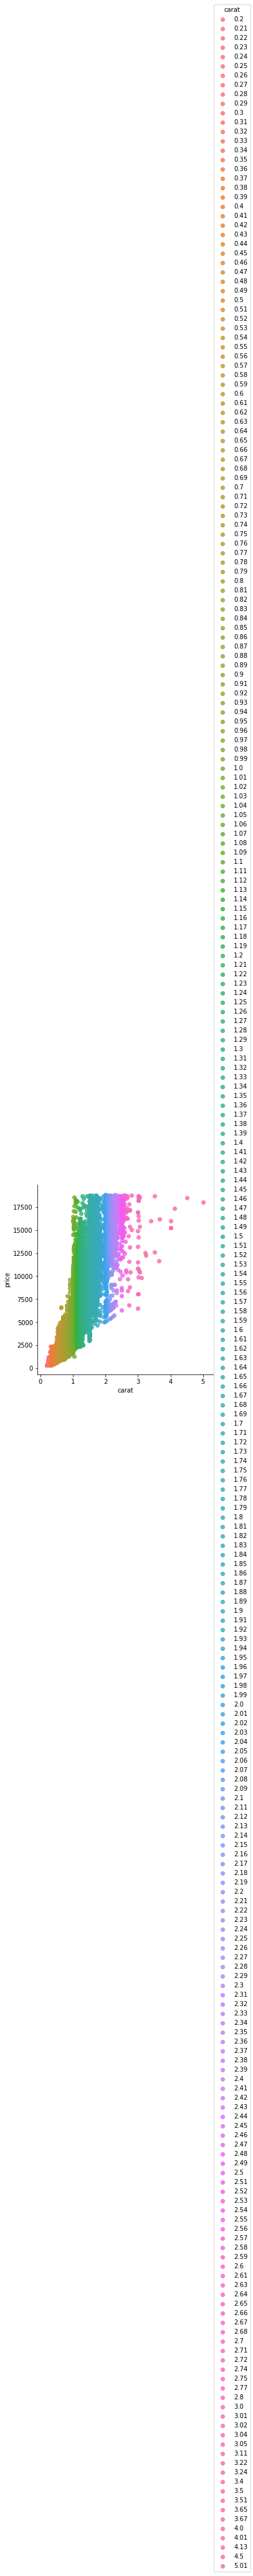

In [156]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df, 
           fit_reg=False, #remove regression line
           hue='carat')   #color by evolution stage

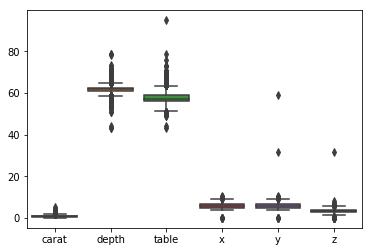

In [163]:
%matplotlib inline
stats_df = df.drop(['price', 'Customer_Prize_Tag', 'mytag'], axis=1)
#stats_df.head()
sns.boxplot(data=stats_df)

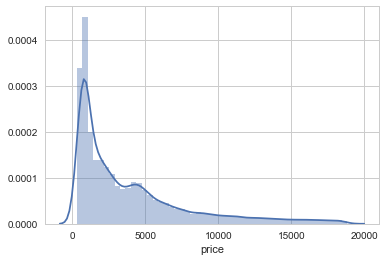

In [178]:
sns.distplot (df['price'])

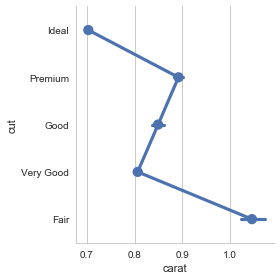

In [194]:
g = sns.factorplot(x='carat', y='cut', data=stats_df)
#g.set_xticklables(rotation=-45)